# Menampilkan peta gempa hari ini

<p style="text-align:justify">Sebagai penutup, penyusun akan mengajak sidang pembaca (yang umumnya dari kalangan geosains) untuk melakukan kegiatan pemetaan gempa selama 24 jam terakhir dari data USGS. Diharapkan modul ini akan membantu pembaca untuk mengaplikasikan materi pembelajaran Cartopy pada bidang keilmuannya masing - masing.</p>

<p style="text-align:justify">Untuk memulai proyek mini ini, kita wajib mengimpor tiga buah pustaka Python, yakni: pandas (untuk membaca data tabular), matplotlib (untuk visualisasi), dan Cartopy (untuk pemetaan).</p>

In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Selain itu, kita juga perlu mengatur tampilan plot agar tampak lebih estetik.

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

Kita membaca data tabular secara *remote* dengan menggunakan pandas.

In [3]:
df = pd.read_csv('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-07-08T04:37:36.100Z,33.658167,-116.725333,15.36,2.35,ml,83.0,17.00,0.05368,0.20,...,2020-07-08T04:41:33.997Z,"9km S of Idyllwild, CA",earthquake,0.19,0.37,0.192,26.0,automatic,ci,ci
1,2020-07-08T04:37:10.820Z,36.455833,-117.953500,9.83,1.48,ml,14.0,150.00,0.10340,0.22,...,2020-07-08T04:47:40.620Z,"18km SE of Lone Pine, CA",earthquake,0.60,1.06,0.174,14.0,automatic,ci,ci
2,2020-07-08T04:28:11.830Z,38.136800,-117.888200,9.00,1.30,ml,10.0,90.21,0.02300,0.08,...,2020-07-08T04:34:29.366Z,"34 km SE of Mina, Nevada",earthquake,NaN,1.20,NaN,NaN,automatic,nn,nn
3,2020-07-08T04:14:48.500Z,38.126200,-118.094000,0.30,2.20,ml,24.0,64.54,0.03900,0.23,...,2020-07-08T04:29:31.779Z,"29 km S of Mina, Nevada",earthquake,NaN,15.10,NaN,NaN,automatic,nn,nn
4,2020-07-08T04:12:46.220Z,36.261333,-89.498497,9.36,2.36,md,26.0,50.00,0.16010,0.21,...,2020-07-08T04:18:13.450Z,"0 km WSW of Ridgely, Tennessee",earthquake,0.36,1.47,0.390,17.0,reviewed,nm,nm


Karena kolom time belum berupa objek datetime, maka kita perlu melakukan konversi sebagai berikut: 

In [4]:
df['time'] = pd.to_datetime(df['time'])
type(df['time'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-07-08 04:37:36.100000+00:00,33.658167,-116.725333,15.36,2.35,ml,83.0,17.00,0.05368,0.20,...,2020-07-08T04:41:33.997Z,"9km S of Idyllwild, CA",earthquake,0.19,0.37,0.192,26.0,automatic,ci,ci
1,2020-07-08 04:37:10.820000+00:00,36.455833,-117.953500,9.83,1.48,ml,14.0,150.00,0.10340,0.22,...,2020-07-08T04:47:40.620Z,"18km SE of Lone Pine, CA",earthquake,0.60,1.06,0.174,14.0,automatic,ci,ci
2,2020-07-08 04:28:11.830000+00:00,38.136800,-117.888200,9.00,1.30,ml,10.0,90.21,0.02300,0.08,...,2020-07-08T04:34:29.366Z,"34 km SE of Mina, Nevada",earthquake,NaN,1.20,NaN,NaN,automatic,nn,nn
3,2020-07-08 04:14:48.500000+00:00,38.126200,-118.094000,0.30,2.20,ml,24.0,64.54,0.03900,0.23,...,2020-07-08T04:29:31.779Z,"29 km S of Mina, Nevada",earthquake,NaN,15.10,NaN,NaN,automatic,nn,nn
4,2020-07-08 04:12:46.220000+00:00,36.261333,-89.498497,9.36,2.36,md,26.0,50.00,0.16010,0.21,...,2020-07-08T04:18:13.450Z,"0 km WSW of Ridgely, Tennessee",earthquake,0.36,1.47,0.390,17.0,reviewed,nm,nm


<p style="text-align:justify">Untuk mendapatkan data gempa hari ini, kita perlu melakukan operasi <i>masking</i>. Sebagai catatan, Notebook ini dibuat pada tanggal 8 Juli 2020. Oleh karena itu, penyusun akan melakukan <i>masking</i> waktu dari tanggal 7 hingga 8 Juli 2020 (hal ini patut disesuaikan oleh pembaca).</p> 

In [6]:
mask = ((df['time'] >= '2020-07-07') & (df['time'] < '2020-07-08'))
gempaHariIni = df.loc[mask]
gempaHariIni.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
56,2020-07-07 23:51:01.840000+00:00,19.364666,-155.218506,-0.19,1.89,ml,19.0,113.0,NaN,0.12,...,2020-07-07T23:56:39.490Z,"8 km S of Volcano, Hawaii",earthquake,0.33,0.38,0.260,4.0,automatic,hv,hv
57,2020-07-07 23:50:59.200000+00:00,19.355000,-155.219330,-0.99,1.89,ml,13.0,122.0,NaN,0.22,...,2020-07-07T23:56:32.460Z,"9 km S of Volcano, Hawaii",earthquake,0.33,0.49,0.260,4.0,automatic,hv,hv
58,2020-07-07 23:49:48.779000+00:00,63.196800,-151.112400,0.00,1.00,ml,NaN,NaN,NaN,0.77,...,2020-07-07T23:52:51.616Z,"49 km SE of Denali National Park, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
59,2020-07-07 23:49:28.655000+00:00,12.982600,92.409200,10.00,4.60,mb,NaN,84.0,1.358,1.21,...,2020-07-08T00:19:28.040Z,"145 km NNW of Bamboo Flat, India",earthquake,8.70,1.90,0.091,36.0,reviewed,us,us
60,2020-07-07 23:31:29.865000+00:00,63.560000,-147.489600,64.70,1.40,ml,NaN,NaN,NaN,0.51,...,2020-07-07T23:36:07.686Z,"73 km ESE of McKinley Park, Alaska",earthquake,NaN,0.90,NaN,NaN,automatic,ak,ak


Kita dapat mengetahui besaran gempa maksimum dan minimum yang terjadi secara global pada hari ini dengan menggunakan perintah sebagai berikut:

In [7]:
print(df[df['mag'] == df['mag'].min()]) # besaran gempa minimum

                                 time   latitude   longitude  depth   mag  \
231  2020-07-07 06:30:21.850000+00:00  33.352000 -116.359833  10.90  0.95   
260  2020-07-07 03:55:13.260000+00:00  34.126833 -117.478167   5.23  0.95   
746  2020-07-05 09:58:50.190000+00:00  37.652500 -118.892333   2.60  0.95   
776  2020-07-05 06:58:02.870000+00:00  33.509167 -116.480000  13.75  0.95   
880  2020-07-04 21:18:50.110000+00:00  34.465333 -117.966000   8.39  0.95   
1415 2020-07-03 04:03:31.650000+00:00  53.860333 -166.751167   8.12  0.95   
1449 2020-07-03 02:08:45.240000+00:00  33.580833 -116.801667   7.10  0.95   
1586 2020-07-02 17:50:28.090000+00:00  37.461833 -118.727500   4.54  0.95   
1781 2020-07-02 05:51:54.490000+00:00  33.334500 -116.187333   8.11  0.95   

     magType   nst    gap      dmin   rms  ...                   updated  \
231       ml  34.0   68.0  0.043300  0.23  ...  2020-07-07T06:34:03.667Z   
260       ml  15.0  123.0  0.097480  0.13  ...  2020-07-07T03:58:59.157Z   
7

In [8]:
print(df[df['mag'] == df['mag'].max()])

                                time  latitude  longitude   depth  mag  \
328 2020-07-06 22:54:46.856000+00:00   -5.6368   110.6783  528.66  6.6   

    magType  nst   gap   dmin   rms  ...                   updated  \
328     mww  NaN  20.0  1.422  0.92  ...  2020-07-07T23:00:40.068Z   

                            place        type horizontalError depthError  \
328  93 km N of Batang, Indonesia  earthquake             8.3        6.4   

     magError  magNst    status  locationSource magSource  
328     0.068    21.0  reviewed              us        us  

[1 rows x 22 columns]


Sesudah itu, kita akan mengekstraksi data bujur, lintang, dan besaran gempa (dalam skala Richter) dalam bentuk objek *list*:

In [9]:
bujur = list(df['longitude'])
lintang = list(df['latitude'])
besaran = list(df['mag'])

<p style="text-align:justify">Kemudian kita akan mengklasifikasikan titik - titik gempa dengan menggunakan warna - warna tertentu (hijau untuk gempa di bawah 3 SR, kuning untuk gempa dengan rentang 3 - 5 SR, dan merah untuk gempa di atas 5 SR) dengan menggunakan fungsi sebagai berikut:</p>

In [10]:
def warna(besaran):
    if besaran < 3.0:
        return 'g'
    elif 3.0 <= besaran < 5.0:
        return 'y'
    else:
        return 'r'

Kemudian kita tinggal melakukan pemetaan dengan menggunakan Cartopy:

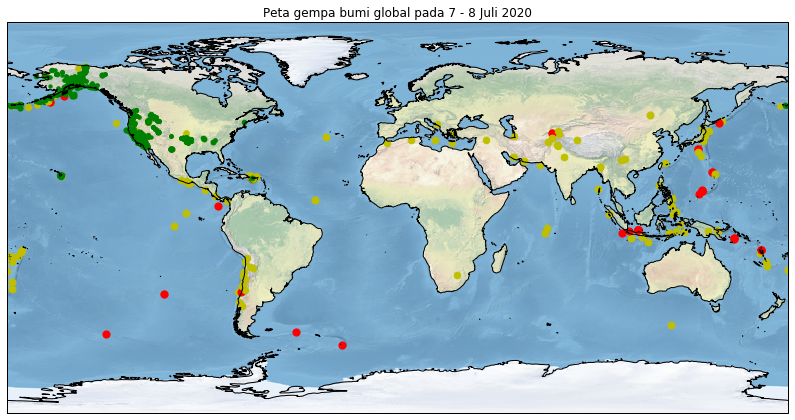

In [15]:
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

for i in range(len(besaran)):
    warnaEpi = warna(besaran[i])
    plt.scatter(bujur[i], lintang[i], s=besaran[i]*10, c=warnaEpi)

plt.title('Peta gempa bumi global pada 7 - 8 Juli 2020');